### Machine learning aplicado ao Airbnb 


<br>

##### <b> Problema de negócio </b> 

<br>

Em sua jornada profissional, Gulliver entendeu ser pertinente desenvolver modelos de aprendizagem de máquina voltados para compreender os preços de hospedagens. Para isso, optou por usar uma base de dados proveniente da AirBNB para São Paulo e, com algumas features coletadas, esteves foi desenvolver um modelo de regressão linear em três algoritmos de regressão: regressão linear múltipla, árvores de regressão e random-forest.
 Inspirado na necessidade de Gulliver, estamos fazendo uso de dados da AirBNB de São Paulo com o objetivo de desenvolver três modelos para predizer o preço de uma hospedagem no AirBNB para São Paulo, e utilizar o melhor deles como nossa solução final.




<br>
<br>

<img src="https://aloalobahia.com/images/p/airnbccrescimentoe_alo_alo_bahia.jpg">

<br>
<hr>
<br>
<br>
<br>
<br>



<br>
<br>

#### 1- bibliotecas a leitura dos dados 

vamos iniciar importando os pacotes necessários para esse projeto de Machine learning, e a carga dos dados.



<br>

In [1]:
!pip install bayesian-optimization
!pip install hyperopt
!pip install eli5

In [62]:
# bibliotecas 
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import eli5
from eli5 import show_weights
from eli5 import show_prediction

import random

import warnings
warnings.filterwarnings("ignore")

from bayes_opt import BayesianOptimization

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Personalizar o print #
class color: # para formatar os prints
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
path = "dataset_airbnb.csv"
df = pd.read_csv(path, sep=";")
df.head()

,room_id,room_type,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,property_type
0,3732200,Shared room,Sao Paulo,SAO PAULO,Mooca,0,0.0,5,1.0,47.0,House
1,2247926,Shared room,Sao Paulo,SAO PAULO,Pinheiros,0,0.0,16,1.0,21.0,Bed & Breakfast
2,2674673,Shared room,Sao Paulo,SAO PAULO,Itaquera,0,0.0,8,1.0,311.0,House
3,2996011,Shared room,Sao Paulo,SAO PAULO,Penha,0,0.0,5,1.0,389.0,Apartment
4,2939182,Shared room,Sao Paulo,SAO PAULO,Iguatemi,0,0.0,4,1.0,311.0,House


In [4]:
df["reviews"].value_counts()

0      5275
1      1134
2       658
3       502
4       391
       ... 
100       1
116       1
132       1
180       1
167       1
Name: reviews, Length: 128, dtype: int64

In [5]:
# número de linhas e colunas  
print(f"número de linhas: {df.shape[0]} | número de colunas: {df.shape[1]}")

número de linhas: 11118 | número de colunas: 11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               11118 non-null  int64  
 1   room_type             11118 non-null  object 
 2   city                  11118 non-null  object 
 3   borough               11118 non-null  object 
 4   neighborhood          11118 non-null  object 
 5   reviews               11118 non-null  int64  
 6   overall_satisfaction  11118 non-null  float64
 7   accommodates          11118 non-null  int64  
 8   bedrooms              11118 non-null  float64
 9   price                 11118 non-null  float64
 10  property_type         11118 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 955.6+ KB


In [7]:
# tipo das colunas 
df.dtypes

room_id                   int64
room_type                object
city                     object
borough                  object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
property_type            object
dtype: object

In [8]:
# estátistica descritiva 
df.describe()

,room_id,reviews,overall_satisfaction,accommodates,bedrooms,price
count,1.111800e+04,11118.000000,11118.000000,11118.000000,11118.000000,11118.000000
mean,1.097865e+07,6.164598,1.752339,3.040295,1.317143,84.027613
std,6.087036e+06,14.204120,2.322813,2.345101,0.897948,223.382397
min,1.077400e+04,0.000000,0.000000,1.000000,0.000000,3.000000
25%,4.758136e+06,0.000000,0.000000,2.000000,1.000000,25.000000
50%,1.233381e+07,1.000000,0.000000,2.000000,1.000000,43.000000
75%,1.646424e+07,6.000000,4.500000,4.000000,2.000000,72.000000
max,1.962464e+07,248.000000,5.000000,16.000000,10.000000,10905.000000


<br>
<br>
<br>


#### 2- Análise Exploratória de dados 


nesta etapa vamos explorar nosso dataset, tirar algumas medidas estátisticas e ver o principais insights que podemos encontrar nestes dados, e assim partir para a modelagem levando em consideração nossas descobertas com esta análise.


<br>
<br>

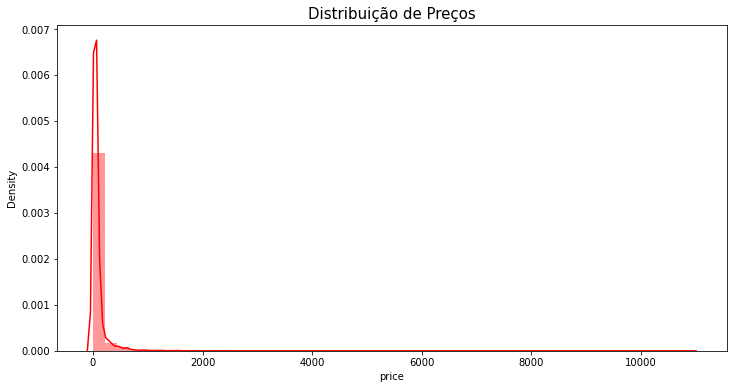




média de preços: 84.02761288001439
desvio padrão de preços: 223.37235119534895


In [9]:
# distribuição do target (price)
plt.figure(figsize=(12,6))
sns.distplot(df["price"], color='red', kde=True)
plt.title("Distribuição de Preços", fontsize=15)
plt.show()



media = np.mean(df["price"])
desvio_padrao = np.std(df["price"])


print("\n\n")
print(f"média de preços: {media}")
print(f"desvio padrão de preços: {desvio_padrao}")

<br>



<br>
<br>

##### Quais tipos de quartos possuem os maiores aluguéis ? 


<br>



número de Quartos compartilhados: 463
número de Casas: 5880
número de Quartos Privados: 4775






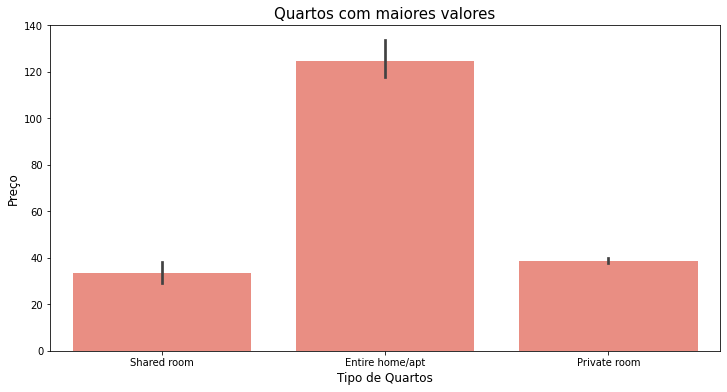

In [10]:
# comparação de quartos e preços 

print("\n")

qtd_shared_room = len(df[df["room_type"]=="Shared room"])
qtd_entire_home = len(df[df["room_type"]=="Entire home/apt"])
qtd_private_room = len(df[df["room_type"]=="Private room"])

print(f"número de Quartos compartilhados: {qtd_shared_room}")
print(f"número de Casas: {qtd_entire_home}")
print(f"número de Quartos Privados: {qtd_private_room}")
print("\n\n\n")



plt.figure(figsize=(12,6))
sns.barplot(x="room_type", y="price", data=df, color="salmon")
plt.ylabel("Preço", fontsize=12)
plt.xlabel("Tipo de Quartos", fontsize=12)
plt.title("Quartos com maiores valores", fontsize=15)
plt.show()

<br>
<br>

Através do gráfico conseguimos ver que os maiores valores são para aluguéis de casas completas, seguidos de quartos privados, e por último quartos compartilhados que é a categoria mais básica dos clientes da AirBNB, seguindo a lógica dos preços da plataforma.  


<br>
<br>


##### Quais bairros possuem avaliações melhores ? 


<br>

In [11]:
df["neighborhood"].value_counts()

Jardim Paulista          944
Itaim Bibi               923
Pinheiros                712
Bela Vista               583
Consolação               547
                        ... 
Itaim Paulista             1
Ouro Fino Paulista         1
Franco da Rocha            1
São Lourenço da Serra      1
Itaquaquecetuba            1
Name: neighborhood, Length: 138, dtype: int64

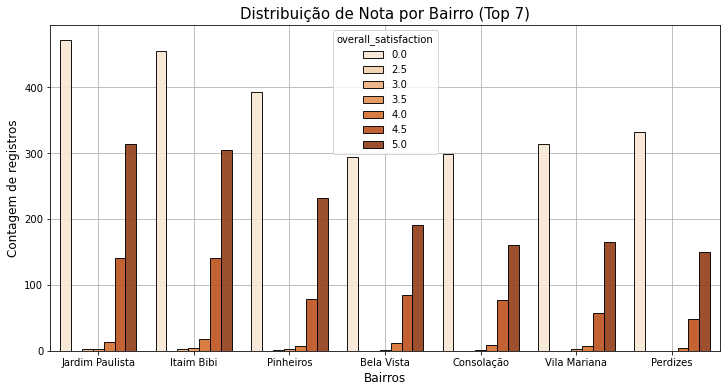

In [12]:
# distribuição de nota por bairros (top 7)

print("\n")

plt.figure(figsize=(12,6))
sns.countplot(x='neighborhood', hue = 'overall_satisfaction',data = df, palette='Oranges', order=pd.value_counts(df['neighborhood']).iloc[:7].index, edgecolor="black",linewidth = 1, zorder = 3, alpha = 0.9 )
plt.grid(True, zorder = 0)
plt.title("Distribuição de Nota por Bairro (Top 7)", fontsize=15)
plt.xlabel('Bairros', fontsize=12)
plt.ylabel('Contagem de registros', fontsize=12)
plt.show()


print('\n\n')

Os bairros de SP com as melhores notas, as acomodações em cada região tem uma distribuição parecida quando olhamos para as notas em cada bairro, Jardim paulista é o bairro com o maior número de notas 5.0 com cerca de <b> 944 </b> avaliações, logo em seguida o Itaim Bibi recebeu cerca de <b> 923 </b> avaliações, Pinheiros segue com <b> 712 </b>, são os três bairros com as melhores avaliações, e esses fazem parte dos bairros mais luxuosos de São Paulo.  


<br>
<br>
<br>
<br>

##### Qual a média de notas por bairros ? 


<br>

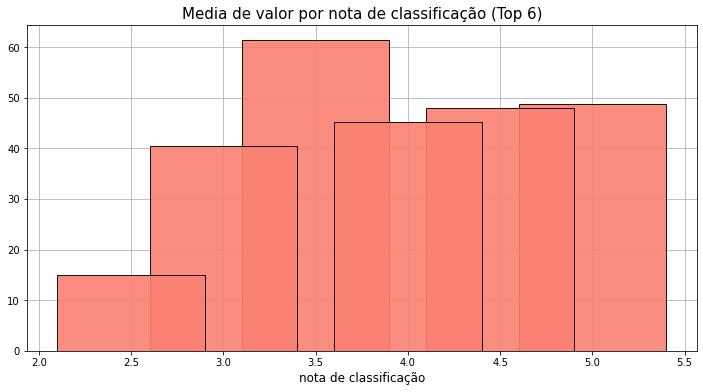

In [13]:
# média de notas (top 6)

print("\n")

df_sorted_desc = df[['overall_satisfaction', 'price']].groupby('overall_satisfaction').mean().reset_index().sort_values('price',ascending=False).iloc[1:]

plt.figure(figsize=(12,6))
plt.bar(df_sorted_desc['overall_satisfaction'],df_sorted_desc['price'],data=df_sorted_desc, edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Media de valor por nota de classificação (Top 6)", fontsize=15)
plt.xlabel('nota de classificação', fontsize=12)
plt.show()

print("\n\n")

<br>
<br>

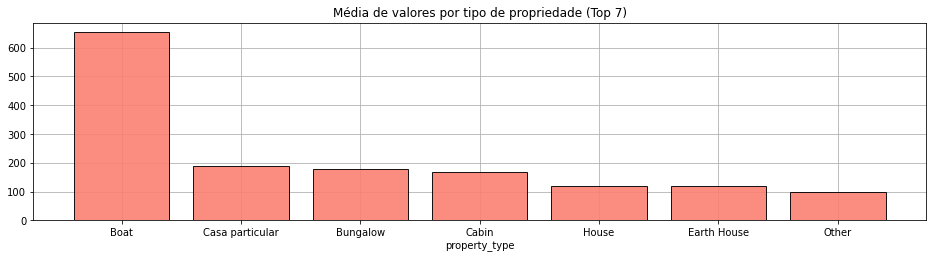

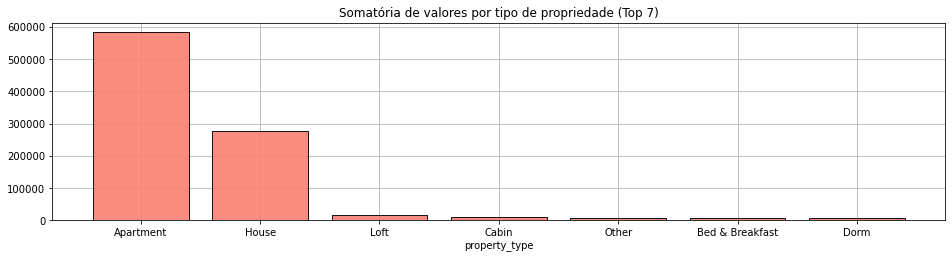

In [14]:
# Somatório e Média de valores por Tipo de propriedades 

print("\n")

df_sorted_desc = df[['property_type', 'price']].groupby('property_type').mean().reset_index().sort_values('price',ascending=False).iloc[:7]

plt.figure(figsize=(16,8))
plt.subplot(2,1,2) 
plt.bar(df_sorted_desc['property_type'],df_sorted_desc['price'],data=df_sorted_desc, edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Média de valores por tipo de propriedade (Top 7)")
plt.xlabel('property_type')
plt.show()

df_sorted_desc = df[['property_type', 'price']].groupby('property_type').sum().reset_index().sort_values('price',ascending=False).iloc[:7]

plt.figure(figsize=(16,8))
plt.subplot(2,1,2) 
plt.bar(df_sorted_desc['property_type'],df_sorted_desc['price'],data=df_sorted_desc, edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Somatória de valores por tipo de propriedade (Top 7)")
plt.xlabel('property_type')
plt.show()


print('\n\n')

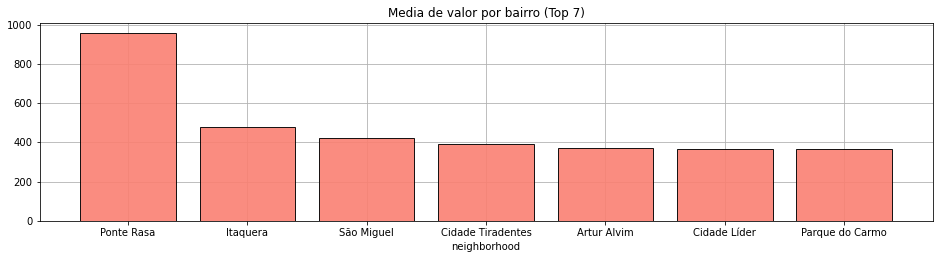

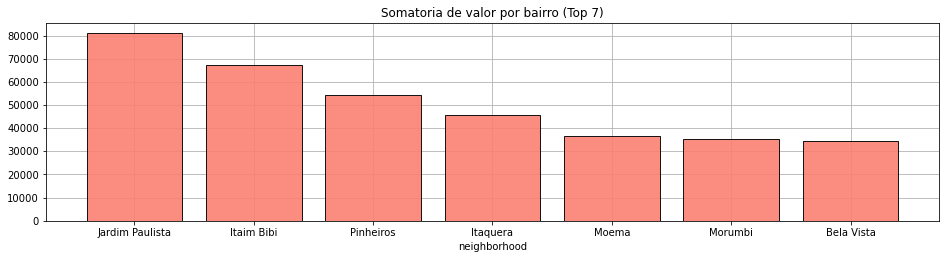

In [15]:
# Média de valor por Bairro 


df_sorted_desc = df[['neighborhood', 'price']].groupby('neighborhood').mean().reset_index().sort_values('price',ascending=False).iloc[:7]
plt.figure(figsize=(16,8))
plt.subplot(2,1,2) 

plt.bar(df_sorted_desc['neighborhood'],df_sorted_desc['price'],data=df_sorted_desc, edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Media de valor por bairro (Top 7)")
plt.xlabel('neighborhood')
plt.show()

df_sorted_desc = df[['neighborhood', 'price']].groupby('neighborhood').sum().reset_index().sort_values('price',ascending=False).iloc[:7]
plt.figure(figsize=(16,8))
plt.subplot(2,1,2) 

plt.bar(df_sorted_desc['neighborhood'],df_sorted_desc['price'],data=df_sorted_desc, edgecolor="black",linewidth = 1, color = 'salmon', zorder = 3, alpha = 0.9)
plt.grid(True, zorder = 0)
plt.title("Somatoria de valor por bairro (Top 7)")
plt.xlabel('neighborhood')
plt.show()

In [16]:
def scatter_plot_r(x, 
                   y, 
                   title_label, 
                   x_label, 
                   y_label):
    """"Plota um gráfico de linhas com dados de previsão e de teste. 
    Args:
          x: variavel independente
          y: variavel dependente
          title_label(str): título do gráfico.
          x_label(str): Nome do label do eixo X.
          y_label(str): Nome do label do eixo Y.
    """
    #Calcula o coef. de Correlação
    pearson = stats.pearsonr(x,y)[0]
    # Determina o estilo
    sns.set_style("whitegrid", {'grid.linestyle': ':'})
    # Determina o tamanho do gráfico.
    fig, ax = plt.subplots(figsize=(9,8))
    #plota o gráfico
    ax = sns.regplot(x=x,
                     y=y,
                     robust = False, # True: ignora os outliers,demora mais para calcular a regressão linear
                     scatter_kws={"color":'#0000CD',"alpha":0.2,"s":50},
                     line_kws={"color":'#00FFFF',"alpha":0.9,"lw":1},
                     label="Coeficiente de Correlação = {0:.2f}".format(pearson))
    #local da legenda
    ax.legend(loc="best")
    #plota titulo
    ax.set_title(title_label, size = 15, fontdict={'family': 'serif','color' : 'black','weight': 'bold'})
    #plota eixo x
    ax.set_xlabel(x_label, horizontalalignment='left', x=0, size = 14)
    #plota eixo y
    ax.set_ylabel(y_label,horizontalalignment='left', y=0, size = 14)
    #retira as linhas que delimitam o gráfico
    sns.despine(top=True, right=True, left=False, bottom=False)
    #seta o Zero como limite
    plt.ylim(ymin=0)  
    #Mostra o gráfico
    plt.show()

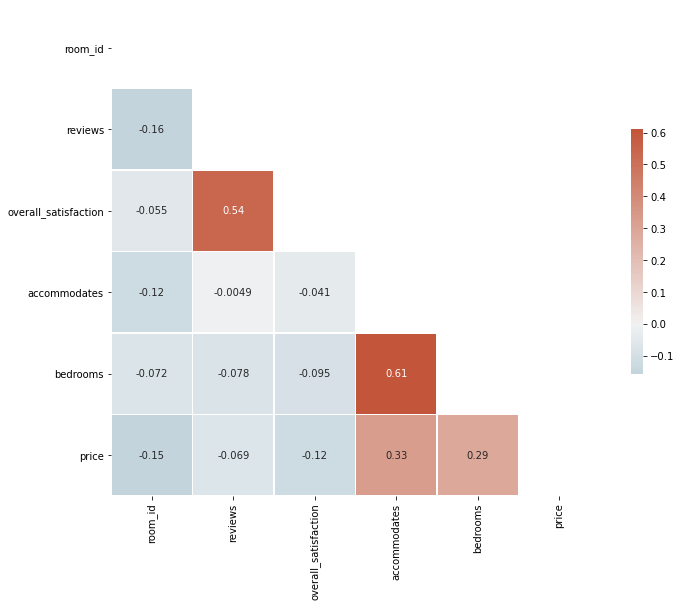

In [17]:
# Gráfico de correlação de Pearson

print("\n")

corr_celular = df.corr()
mask = np.triu(np.ones_like(corr_celular, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

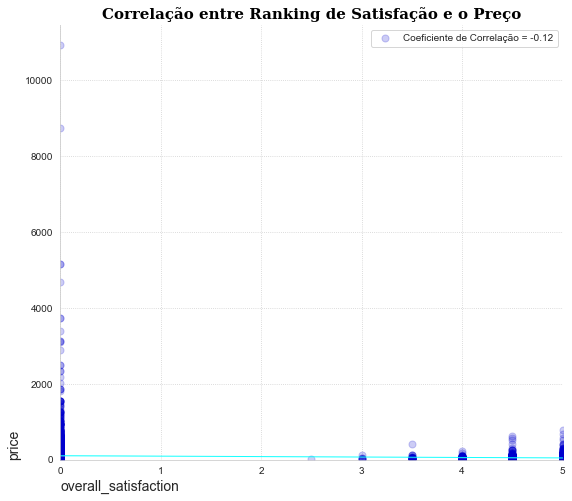

In [18]:
scatter_plot_r(df['overall_satisfaction'], df['price'], "Correlação entre Ranking de Satisfação e o Preço", "overall_satisfaction", "price")

<br>


analisando as correlações das váriaveis com o target <b> Price </b> identificamos que temos poucas correlações positivas, apenas as váriaveis <b> accommodates </b> e <b> bedrooms </b> com uma correlção de pearson por volta de 0.33 e .29 considerasas baixas.


<br>



<br>
<br>
<hr>
<br>
<br>

##### 3- Modelagem 


etapa que vamos modelar os dados para serem usados no treinamendo dos modelos


<br>

In [19]:
# valores nulos 
df.isnull().sum()

room_id                 0
room_type               0
city                    0
borough                 0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
property_type           0
dtype: int64

In [20]:
# retirar variáveis 
df.drop("room_id",  axis=1, inplace=True)

In [21]:
# categóricas e numéricas 
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(exclude="object").columns


# dummies 
dummies = pd.get_dummies(df[cat_cols], prefix=cat_cols, drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.drop(cat_cols, axis=1, inplace=True)

<br>
<br>
<hr>
<br>
<br>
<br>


#### 4- Validação Cruzada & Gráficos de cada modelagem preditiva para facilitar a interpretação


Vamos aplicar validação cruzada utilizando o <b> KFold </b> nos quatro modelos principais.<br><br> 
Além disso, colocaremos um gráfico em cada modelagem preditiva, para que facilite nossa 
visualização quanto aos valores reais e preditos de nossa variável target (Preço)


<br>
<br>

In [22]:
# Gráficos utilizados #


def line_plot(previsao, 
              teste, 
              previsao_label, 
              teste_label, 
              title_label, 
              x_label, 
              y_label):
    """"Plota um gráfico de linhas com dados de previsão e de teste. 
    Args:
          previsao(Series): Serie com os dados de previsão.
          teste(Series): Serie com os dados de teste.
          previsao_label(str): Nome do label da previsão na legenda.
          teste_label(str): Nome do label de teste na legenda.
          title_label(str): título do gráfico.
          x_label(str): Nome do label do eixo X.
          y_label(str): Nome do label do eixo Y.
    """
    # Determina o estilo
    plt.style.use('bmh')
    # Determina a cor de fundo do gráfico
    plt.rcParams['axes.facecolor'] = 'white'    
    # Determina o tamanho do gráfico.
    plt.figure(figsize=(8,6), dpi=100)
    #Plota o título
    plt.title(title_label, fontsize=13, fontdict={'family': 'serif','color' : 'black','weight': 'bold'})
    # Determina a espessura da linha 
    plt.rcParams['lines.linewidth'] = 2
    plt.plot(previsao, label=previsao_label, color = '#00BFFF' , linestyle = 'solid')
    plt.rcParams['lines.linewidth'] = 1
    #lista de estilos de linha
    #http://matplotlib.org/1.5.3/api/pyplot_api.html#matplotlib.pyplot.plot
    #Plota a linha com o teste , cor pode ser substituída por hexadecimal - exemplo: #845ec2
    plt.plot(teste, label=teste_label, color = '#483D8B', linestyle ='--')
    #Plota a linha com a previsão , estilos de linha suportados : 'solid', 'dashed', 'dashdot', 'dotted'
 
    # Determina o tamanho das letras.(loc em geral upper left/ upper right)
    plt.legend(loc="upper right",fontsize=12)
    #Plota o label do eixo x próximo da origem (x=0 , máximo x=1)
    plt.xlabel(x_label,fontsize=14, horizontalalignment='left', x=0)
    #Plota o label do eixo y próximo da origem (y=0 , máximo y=1)
    plt.ylabel(y_label,fontsize=14, horizontalalignment='left', y=0)
    #seta a base do gráfico com 0
    plt.ylim(ymin=0)  
    #Mostra o gráfico
    plt.show()

#### << Modelo de Regressão Linear -> 4º Lugar >>

In [23]:
X = df.drop("price", axis=1)
y = df['price']

# validação cruzada 
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 
rmse_results = []
mse_results = []
mae_results = []
r2_results = []

print(color.BOLD)

fold = 0
print('<<< Regressão Linear >>>')
print('\n')


for train_index, test_index in kfold.split(X):
    fold += 1
    print('_'*23)
    print("\n")
    print('Fold: ', fold)
    print('Treino: ',train_index.shape[0])
    print('Teste: ', test_index.shape[0])
    


    # separando os dados 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
    

    # Normalizer 
    normalizer = MinMaxScaler()
    X_train = normalizer.fit_transform(X_train)
    X_test = normalizer.transform(X_test)
    
    # modelo Regressão Linear
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)


    # métricas 
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_results.append(mse)
    rmse_results.append(rmse)
    mae_results.append(mae)
    r2_results.append(r2)
    
    print('-'*23)
    print('Validação Cruzada (RL):')
    print('RMSE: {}'.format(rmse))
    print('MSE: {}'.format(mse))
    print('MAE: {}'.format(mae))
    print("R2: {}".format(r2))

print('_'*54)
print('Cross-Validation (Regressão Linear):')
print('-> RMSE (Root Mean Squared Error): {};'.format(np.mean(rmse_results))) 
print('-> MSE (Mean Squared Error): {};'.format(np.mean(mse_results)))
print('-> MAE (Mean Absolute Error): {};'.format(np.mean(mae_results))) 
print('-> R2 (Root Squared): {}.'.format(np.mean(r2_results)))
print('_'*54)
print(color.END)


<<< Regressão Linear >>>


_______________________


Fold:  1
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (RL):
RMSE: 784114526596.6248
MSE: 6.14835590819849e+23
MAE: 31167901295.243343
R2: -1.386152013591959e+19
_______________________


Fold:  2
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (RL):
RMSE: 284.2271318668168
MSE: 80785.06248923687
MAE: 68.15602254524505
R2: 0.09913781206539962
_______________________


Fold:  3
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (RL):
RMSE: 4352749427538.331
MSE: 1.894642757893527e+25
MAE: 142473272865.90778
R2: -6.793281251227326e+20
_______________________


Fold:  4
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (RL):
RMSE: 1554936062779.8394
MSE: 2.4178261593332682e+24
MAE: 32979404198.018288
R2: -1.5073262605231902e+20
_______________________


Fold:  5
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (RL):
RMSE: 1055776953579.

In [24]:
y_test_ar = np.array(y_test)
y_test_series_RL = pd.Series(y_test_ar)
y_pred_series_RL = pd.Series(y_pred)

In [25]:
y_test_series_RL

0        21.0
1       311.0
2       515.0
3       280.0
4       186.0
        ...  
2218     11.0
2219     15.0
2220     28.0
2221     12.0
2222     19.0
Length: 2223, dtype: float64

In [26]:
y_pred_series_RL

0       209.283447
1       386.013916
2        20.474854
3        10.498291
4        16.654541
           ...    
2218     15.927979
2219    -16.954834
2220     24.068604
2221     -6.532959
2222     14.381104
Length: 2223, dtype: float64

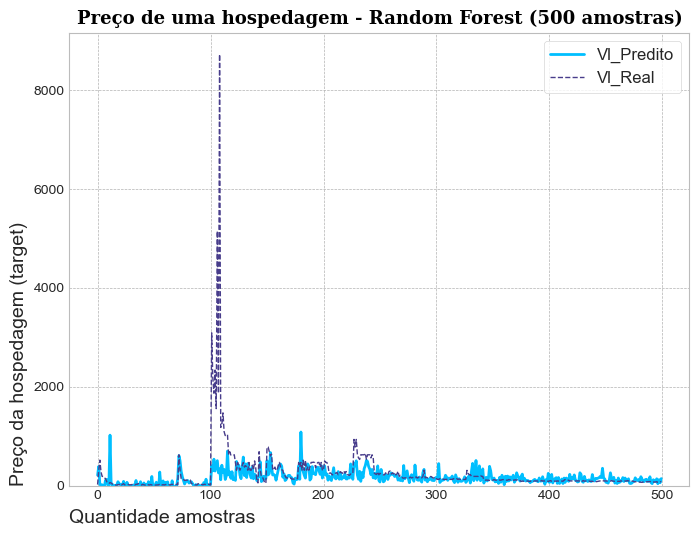

In [27]:
line_plot(y_pred_series_RL[0:500],y_test_series_RL[0:500],'Vl_Predito','Vl_Real','Preço de uma hospedagem - Random Forest (500 amostras)','Quantidade amostras','Preço da hospedagem (target)')

#### << Modelo KNN -> 3º Lugar >>

In [28]:
X = df.drop("price", axis=1)
y = df['price']

# validação cruzada 
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 

rmse_results = []
mse_results = []
mae_results = []
r2_results = []

print(color.BOLD)

fold = 0
print('<<< K Nearest Neighbors >>>')
print('\n')


for train_index, test_index in kfold.split(X):
    fold += 1
    print('_'*23)
    print("\n")
    print('Fold: ', fold)
    print('Treino: ',train_index.shape[0])
    print('Teste: ', test_index.shape[0])
    


    # separando os dados 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
    

    # Normalizer 
    normalizer = MinMaxScaler()
    X_train = normalizer.fit_transform(X_train)
    X_test = normalizer.transform(X_test)
    
    # modelo K Nearest Neighbors
    model_knn = KNeighborsRegressor()
    model_knn.fit(X_train,y_train)
    y_pred_knn = model_knn.predict(X_test)


    # métricas 
    mse = mean_squared_error(y_test,y_pred_knn)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    mae = mean_absolute_error(y_test,y_pred_knn)
    r2 = r2_score(y_test, y_pred_knn)

    mse_results.append(mse)
    rmse_results.append(rmse)
    mae_results.append(mae)
    r2_results.append(r2)
    print('-'*23)
    print('Validação Cruzada (KNN):')
    print('RMSE: {}'.format(rmse))
    print('MSE: {}'.format(mse))
    print('MAE: {}'.format(mae))
    print("R2: {}".format(r2))

print('_'*54)
print('Cross-Validation (K Nearest Neighbors):')
print('-> RMSE (Root Mean Squared Error): {};'.format(np.mean(rmse_results))) 
print('-> MSE (Mean Squared Error): {};'.format(np.mean(mse_results)))
print('-> MAE (Mean Absolute Error): {}.'.format(np.mean(mae_results))) 
print('-> R2 (Root Squared): {}'.format(np.mean(r2_results)))
print('_'*54)


<<< K Nearest Neighbors >>>


_______________________


Fold:  1
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (KNN):
RMSE: 202.15032314463912
MSE: 40864.75314748201
MAE: 56.14703237410072
R2: 0.07870070135679841
_______________________


Fold:  2
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (KNN):
RMSE: 296.15826394372027
MSE: 87709.71730215827
MAE: 62.40125899280575
R2: 0.021918589931464116
_______________________


Fold:  3
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (KNN):
RMSE: 149.46834660452575
MSE: 22340.786636690646
MAE: 51.39253597122302
R2: 0.1989664206383892
_______________________


Fold:  4
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (KNN):
RMSE: 129.38540905207802
MSE: 16740.58407557355
MAE: 51.12280701754386
R2: -0.04364500715662145
_______________________


Fold:  5
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (KNN):
RMSE: 256.8019967116099
MSE: 659

In [29]:
y_test_ar = np.array(y_test)
y_test_series_knn = pd.Series(y_test_ar)
y_pred_series_knn = pd.Series(y_pred_knn)

In [30]:
y_test_series_knn

0        21.0
1       311.0
2       515.0
3       280.0
4       186.0
        ...  
2218     11.0
2219     15.0
2220     28.0
2221     12.0
2222     19.0
Length: 2223, dtype: float64

In [31]:
y_pred_series_knn

0        15.8
1       196.4
2        22.8
3        22.8
4        25.0
        ...  
2218     23.4
2219     20.6
2220     30.0
2221     23.8
2222     57.6
Length: 2223, dtype: float64

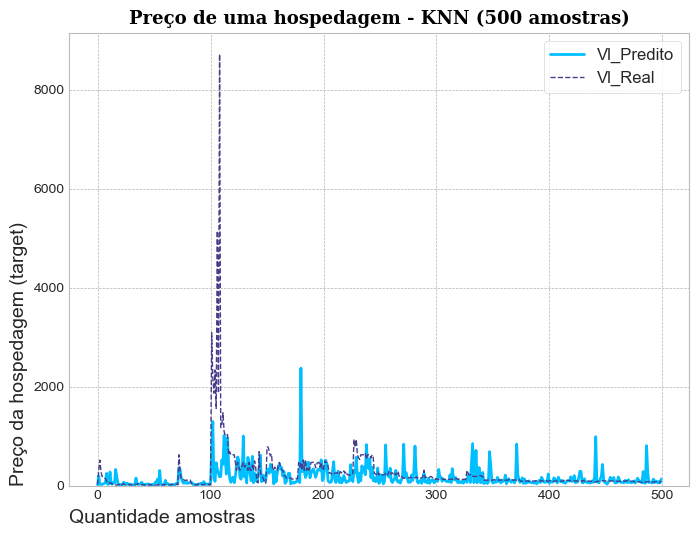

In [32]:
line_plot(y_pred_series_knn[0:500],y_test_series_knn[0:500],'Vl_Predito','Vl_Real','Preço de uma hospedagem - KNN (500 amostras)','Quantidade amostras','Preço da hospedagem (target)')

#### << Modelo Decision Tree -> 2º Lugar >>

In [100]:
X = df.drop("price", axis=1)
y = df['price']

# validação cruzada 
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 

rmse_results = []
mse_results = []
mae_results = []
r2_results = []

print(color.BOLD)

fold = 0
print('<<< Decision Tree >>>')
print('\n')


for train_index, test_index in kfold.split(X):
    fold += 1
    print('_'*23)
    print("\n")
    print('Fold: ', fold)
    print('Treino: ',train_index.shape[0])
    print('Teste: ', test_index.shape[0])
    


    # separando os dados 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
    

    # Normalizer 
    normalizer = MinMaxScaler()
    X_train = normalizer.fit_transform(X_train)
    X_test = normalizer.transform(X_test)
    
    # modelo Random Forest
    model_dt = DecisionTreeRegressor(max_depth = 4, min_samples_split = 2, min_samples_leaf=20, random_state=42)
    model_dt.fit(X_train,y_train)
    y_pred_dt = model_dt.predict(X_test)


    # métricas 
    mse = mean_squared_error(y_test,y_pred_dt)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
    mae = mean_absolute_error(y_test,y_pred_dt)
    r2 = r2_score(y_test, y_pred_dt)

    mse_results.append(mse)
    rmse_results.append(rmse)
    mae_results.append(mae)
    r2_results.append(r2)
    print('-'*23)
    print('Validação Cruzada (DT):')
    print('RMSE: {}'.format(rmse))
    print('MSE: {}'.format(mse))
    print('MAE: {}'.format(mae))
    print("R2: {}".format(r2))

print('_'*54)
print('Cross-Validation (Decision Tree):')
print('-> RMSE (Root Mean Squared Error): {};'.format(np.mean(rmse_results))) 
print('-> MSE (Mean Squared Error): {};'.format(np.mean(mse_results)))
print('-> MAE (Mean Absolute Error): {}.'.format(np.mean(mae_results))) 
print('-> R2 (Root Squared): {}'.format(np.mean(r2_results)))
print('_'*54)


<<< Decision Tree >>>


_______________________


Fold:  1
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (DT):
RMSE: 181.27179035999166
MSE: 32859.46198031676
MAE: 56.39644012556069
R2: 0.2591806643979654
_______________________


Fold:  2
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (DT):
RMSE: 291.83005815388486
MSE: 85164.78284209981
MAE: 60.44222078906154
R2: 0.050298034784203804
_______________________


Fold:  3
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (DT):
RMSE: 143.64123077112433
MSE: 20632.80317744339
MAE: 51.92760854395329
R2: 0.2602065249418033
_______________________


Fold:  4
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (DT):
RMSE: 114.51914194155829
MSE: 13114.633871030774
MAE: 48.69231625420526
R2: 0.18240474177007193
_______________________


Fold:  5
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (DT):
RMSE: 240.5219703105464
MSE: 57850.8182020673

In [34]:
y_test_ar = np.array(y_test)
y_test_series_dt = pd.Series(y_test_ar)
y_pred_series_dt = pd.Series(y_pred_dt)

In [35]:
y_test_series_dt

0        21.0
1       311.0
2       515.0
3       280.0
4       186.0
        ...  
2218     11.0
2219     15.0
2220     28.0
2221     12.0
2222     19.0
Length: 2223, dtype: float64

In [36]:
y_pred_series_dt

0       44.833333
1       82.516619
2       82.516619
3       82.516619
4       82.516619
          ...    
2218    27.761543
2219    27.761543
2220    27.761543
2221    27.761543
2222    27.761543
Length: 2223, dtype: float64

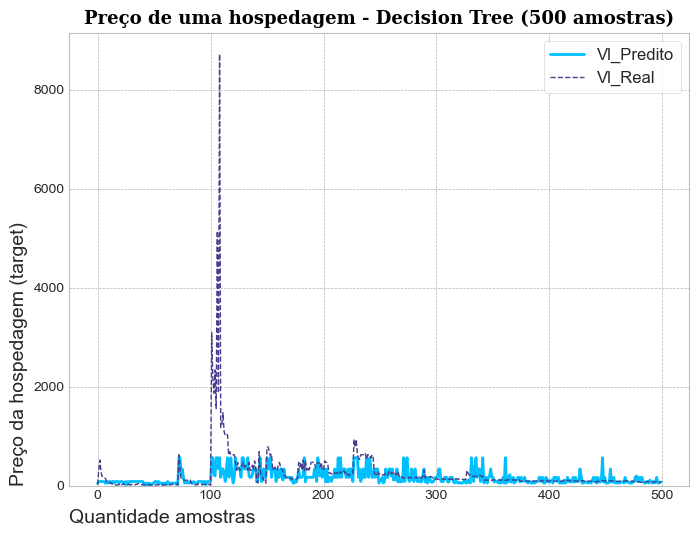

In [37]:
line_plot(y_pred_series_dt[0:500],y_test_series_dt[0:500],'Vl_Predito','Vl_Real','Preço de uma hospedagem - Decision Tree (500 amostras)','Quantidade amostras','Preço da hospedagem (target)')

#### << Modelo Random Forest Regressor -> 1º Lugar >>

In [38]:
X = df.drop("price", axis=1)
y = df['price']

# validação cruzada 
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 
rmse_results = []
mse_results = []
mae_results = []
r2_results = []

print(color.BOLD)

fold = 0
print('<<< Random Forest >>>')
print('\n')


for train_index, test_index in kfold.split(X):
    fold += 1
    print('_'*23)
    print("\n")
    print('Fold: ', fold)
    print('Treino: ',train_index.shape[0])
    print('Teste: ', test_index.shape[0])
    


    # separando os dados 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  
    

    # Normalizer 
    normalizer = MinMaxScaler()
    X_train = normalizer.fit_transform(X_train)
    X_test = normalizer.transform(X_test)
    
    # modelo Random Forest
    model_rf = RandomForestRegressor(n_estimators = 100, max_depth = 4, min_samples_leaf = 20, random_state = 42)
    model_rf.fit(X_train,y_train)
    y_pred_rf = model_rf.predict(X_test)


    # métricas 
    mse = mean_squared_error(y_test,y_pred_rf)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    mae = mean_absolute_error(y_test,y_pred_rf)
    r2 = r2_score(y_test, y_pred_rf)

    mse_results.append(mse)
    rmse_results.append(rmse)
    mae_results.append(mae)
    r2_results.append(r2)
    print('-'*23)
    print('Validação Cruzada (RF):')
    print('RMSE: {}'.format(rmse))
    print('MSE: {}'.format(mse))
    print('MAE: {}'.format(mae))
    print("R2: {}".format(r2))

print('_'*54)
print('Cross-Validation (Random Forest):')
print('-> RMSE (Root Mean Squared Error): {};'.format(np.mean(rmse_results))) 
print('-> MSE (Mean Squared Error): {};'.format(np.mean(mse_results)))
print('-> MAE (Mean Absolute Error): {}.'.format(np.mean(mae_results))) 
print('-> R2 (Root Squared): {}'.format(np.mean(r2_results)))
print('_'*54)


<<< Random Forest >>>


_______________________


Fold:  1
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (RF):
RMSE: 178.17535213298643
MSE: 31746.45610771371
MAE: 54.903773999053406
R2: 0.2842734754597187
_______________________


Fold:  2
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (RF):
RMSE: 288.8861845385884
MSE: 83455.22761726336
MAE: 58.97548195916133
R2: 0.06936187669738403
_______________________


Fold:  3
Treino:  8894
Teste:  2224
-----------------------
Validação Cruzada (RF):
RMSE: 134.2607873944337
MSE: 18025.959031773324
MAE: 48.42902454604823
R2: 0.3536754672311727
_______________________


Fold:  4
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (RF):
RMSE: 109.35607828620152
MSE: 11958.751858137837
MAE: 47.829462275195304
R2: 0.25446498089745295
_______________________


Fold:  5
Treino:  8895
Teste:  2223
-----------------------
Validação Cruzada (RF):
RMSE: 240.5223264061474
MSE: 57850.9894998253

In [39]:
y_test_ar = np.array(y_test)
y_test_series_rf = pd.Series(y_test_ar)
y_pred_series_rf = pd.Series(y_pred_rf)

In [40]:
y_test_series_rf

0        21.0
1       311.0
2       515.0
3       280.0
4       186.0
        ...  
2218     11.0
2219     15.0
2220     28.0
2221     12.0
2222     19.0
Length: 2223, dtype: float64

In [41]:
y_pred_series_rf

0       129.187245
1       102.450995
2        76.962899
3        76.962899
4        76.962899
           ...    
2218     27.839805
2219     27.577688
2220     27.839805
2221     27.839805
2222     27.839805
Length: 2223, dtype: float64

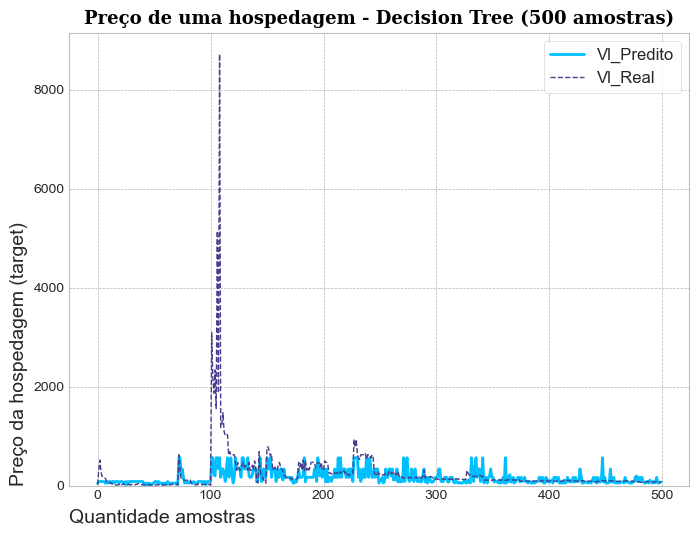

In [42]:
line_plot(y_pred_series_dt[0:500],y_test_series_dt[0:500],'Vl_Predito','Vl_Real','Preço de uma hospedagem - Decision Tree (500 amostras)','Quantidade amostras','Preço da hospedagem (target)')

<br>
<br>
<br>
<hr>
<br>
<br>
<br>


#### 5- Tuning de Hiperparâmetros 

<br>
<br>



###### Random Forest Tunning 


<br>

In [43]:
from hyperopt import hp, fmin, Trials, tpe

In [44]:
# objective function 
def objective(params):
  return -np.sqrt(mean_squared_error(y_test, y_pred))

In [45]:
  spaces_random_forest={'n_estimators': hp.randint('n_estimators', 1200),
                    'max_depth': hp.randint('max_depth', 30),
                    'min_samples_split': hp.uniform('min_samples_split', 0.0, 1.0),
                    'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
                    'min_weight_fraction_leaf': hp.uniform('min_weight_fraction_leaf', 0.0, 0.10),
                    'min_impurity_decrease': hp.uniform('min_impurity_decrease', 0.0, 0.10)}

In [46]:
trials = Trials()
random_tunning = fmin(objective, spaces_random_forest, algo=tpe.suggest, max_evals=50, trials=trials, verbose=1)

100%|██████████████████████████████████████████████| 50/50 [00:00<00:00, 137.72trial/s, best loss: -1055776953579.8378]


In [47]:
rnd_forest = RandomForestRegressor(**random_tunning, random_state=49)
rnd_forest.fit(X_train, y_train)
y_pred_tunning_forest = rnd_forest.predict(X_test)


print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tunning_forest))}")
print(f"R2: {r2_score(y_test, y_pred_tunning_forest)}")

RMSE: 267.18271802662844
R2: -0.0004305772960992993


<br>
<br>
<br>
<hr>
<br>
<br>


###### Decision Tree Tunning


<br>
<br>

In [48]:
spaces_decision_tree ={
                      'max_depth': hp.randint('max_depth', 30),
                      'min_samples_split': hp.uniform('min_samples_split', 0.0, 1.0),
                      'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5)}  

In [49]:
trials = Trials()
tree_tunning = fmin(objective, spaces_decision_tree, algo=tpe.suggest, max_evals=50, trials=trials, verbose=1)

100%|██████████████████████████████████████████████| 50/50 [00:00<00:00, 210.14trial/s, best loss: -1055776953579.8378]


In [50]:
decision_tree = DecisionTreeRegressor(**tree_tunning, random_state=49)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)


print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tree))}")
print(f"R2: {r2_score(y_test, y_pred_tree)}")

RMSE: 259.67330583475245
R2: 0.05501515494399856


<br>
<br>
<br>
<hr>
<br>
<br>
<br>

<br>
<br>
<hr>
<br>
<br>
<br>


#### 6- Utilizando o ELI5 para vermos o peso de cada variável quando comparada com a target na predição, analisando o TOP 4

<br>
<br>

In [92]:
# selecionando apenas variáveis independentes
X = df.drop('price', axis=1)
# selecionando apenas a variável dependente(target)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.9, test_size=0.1, random_state=12)# serve para tornar o processo em algo reprodutivo

# vendo o shape de cada um dos x(linhas e colunas)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10006, 201), (1112, 201), (10006,), (1112,))

#### << Modelo Regressão Linear -> 4º Lugar >>

In [80]:
X.columns

Index(['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms',
       'room_type_Private room', 'room_type_Shared room', 'borough_BARUERI',
       'borough_CAIEIRAS', 'borough_CAJAMAR', 'borough_CARAPICUIBA',
       ...
       'property_type_Other', 'property_type_Plane', 'property_type_Pousada',
       'property_type_Serviced apartment', 'property_type_Tent',
       'property_type_Timeshare', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Vacation home',
       'property_type_Villa'],
      dtype='object', length=201)

In [120]:
show_weights(model, feature_names = list(X.columns), top = (6, 6))

In [98]:
rand = random.randint(1, len(X_test))

show_prediction(model, X_test.iloc[rand], show_feature_values=True)

#### << Modelo KNN -> 3º Lugar >>

In [123]:
show_weights(model_knn, feature_names = list(X.columns), top = (6, 6))

#### << Decision Tree -> 2º Lugar >>

In [122]:
show_weights(model_dt, feature_names=list(X.columns), show=["feature_importances"], top = 8)

In [138]:
X_test_series = pd.DataFrame(X_test)
X_test_series.head(1)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.0,0.0,1.0,0.1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
rand = random.randint(1, len(X_test))

print("Actual Target Value : ", y_test.iloc[rand])

show_prediction(model_dt,
                X_test_series.iloc[rand],
                feature_names=list(X.columns),
                show_feature_values=True,
                )

Actual Target Value :  16.0


#### << Random Forest -> 1º Lugar >>

In [119]:
show_weights(model_rf, feature_names=list(X.columns), show=["feature_importances"], top = 14)

Weight,Feature
0.5179 ± 0.1767,accommodates
0.2322 ± 0.0553,reviews
0.1536 ± 0.1811,bedrooms
0.0520 ± 0.0875,property_type_House
0.0299 ± 0.0376,room_type_Private room
0.0050 ± 0.0404,borough_SAO PAULO
0.0041 ± 0.0194,room_type_Shared room
0.0018 ± 0.0167,neighborhood_Vila Andrade
0.0015 ± 0.0193,neighborhood_Pinheiros
0.0009 ± 0.0129,neighborhood_Artur Alvim


In [139]:
rand = random.randint(1, len(X_test))

print("Actual Target Value : ", y_test.iloc[rand])

show_prediction(model_rf,
                X_test_series.iloc[rand],
                feature_names=list(X.columns),
                show_feature_values=True,
                )

Actual Target Value :  56.0
